<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I will be using "Open Parking and Camera Violations" dataset from  https://opendata.cityofnewyork.us/. This dataset contains Open Parking and Camera Violations issued by the City of New York. I chose this dataset to have an overview the different types of violations and see if there is any pattern in this data.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("https://data.cityofnewyork.us/resource/nc67-uf89.csv")

In [3]:
df1.shape

(1000, 19)

In [20]:
df1.describe()

,summons_number,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct
count,1.000000e+03,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,6.780960e+09,71.136606,11.947705,1.357812,10.973671,72.559157,0.909296,38.068303
std,2.212511e+09,29.398611,20.326408,8.435851,26.818184,41.071210,16.060445,40.246511
min,1.359672e+09,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.635456e+09,50.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1.000000
50%,7.809121e+09,65.000000,0.000000,0.000000,0.000000,65.000000,0.000000,19.000000
75%,8.676132e+09,115.000000,25.000000,0.000000,0.180000,102.980000,0.000000,78.000000
max,8.726103e+09,165.000000,60.000000,121.380000,165.000000,251.910000,296.380000,115.000000


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   plate                1000 non-null   object 
 1   state                1000 non-null   object 
 2   license_type         1000 non-null   object 
 3   summons_number       1000 non-null   int64  
 4   issue_date           1000 non-null   object 
 5   violation_time       937 non-null    object 
 6   violation            936 non-null    object 
 7   judgment_entry_date  157 non-null    object 
 8   fine_amount          937 non-null    float64
 9   penalty_amount       937 non-null    float64
 10  interest_amount      937 non-null    float64
 11  reduction_amount     937 non-null    float64
 12  payment_amount       937 non-null    float64
 13  amount_due           937 non-null    float64
 14  precinct             937 non-null    float64
 15  county               930 non-null    ob

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [4]:
# Fix the value for issuing_agency when value if TRAFFIC 

df1.loc[df1['issuing_agency'] == 'TRAFFIC', 'issuing_agency'] = 'DEPARTMENT OF TRAFFIC'
df1

,plate,state,license_type,summons_number,issue_date,violation_time,violation,judgment_entry_date,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct,county,issuing_agency,violation_status,summons_image
0,81054MH,NY,COM,8636115863,12/28/2021,03:27P,NO STANDING-DAY/TIME LIMITS,NaN,115.0,0.0,0.00,0.0,115.00,0.00,52.0,BX,DEPARTMENT OF TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
1,KFX9844,PA,PAS,8528103092,03/13/2017,08:40A,NO PARKING-STREET CLEANING,06/29/2017,45.0,60.0,45.60,0.0,0.00,150.60,41.0,BX,DEPARTMENT OF TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
2,BWT8672,FL,PAS,8528103158,03/13/2017,09:07A,FRONT OR BACK PLATE MISSING,06/29/2017,65.0,60.0,55.72,0.0,0.00,180.72,41.0,BX,DEPARTMENT OF TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
3,T687077C,NY,OMT,8528103389,03/13/2017,11:37A,NO PARKING-STREET CLEANING,08/30/2018,45.0,60.0,34.64,0.0,0.00,139.64,41.0,BX,DEPARTMENT OF TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
4,HKZ3547,NY,PAS,8528104084,03/21/2017,08:39A,NO PARKING-STREET CLEANING,07/06/2017,45.0,60.0,17.11,0.0,89.35,32.76,43.0,BX,DEPARTMENT OF TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2870248,IN,PAS,8755003576,06/13/2019,08:32A,FRONT OR BACK PLATE MISSING,NaN,65.0,10.0,0.00,75.0,0.00,0.00,13.0,NY,DEPARTMENT OF TRAFFIC,HEARING HELD-NOT GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
996,87270MK,NY,COM,8579515750,02/23/2022,11:55A,EXPIRED MUNI METER,NaN,35.0,0.0,0.00,5.0,30.00,0.00,110.0,Q,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY REDUCTION,View Summons (http://nycserv.nyc.gov/NYCServWe...
997,EUXZ21,FL,PAS,8528203852,03/10/2017,02:28P,FAIL TO DSPLY MUNI METER RECPT,06/29/2017,35.0,60.0,40.54,0.0,0.00,135.54,52.0,BX,DEPARTMENT OF TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
998,JMK6795,NY,PAS,8605996730,12/05/2021,10:37A,NO STANDING-BUS STOP,NaN,115.0,0.0,0.00,0.0,115.00,0.00,46.0,BX,DEPARTMENT OF TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...


In [5]:
# create a new dataframe df2 by dropping all missing vales

df2 = df1.dropna()
df2

,plate,state,license_type,summons_number,issue_date,violation_time,violation,judgment_entry_date,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct,county,issuing_agency,violation_status,summons_image
11,HES4557,NY,PAS,8528106172,04/01/2017,09:51A,INSP. STICKER-EXPIRED/MISSING,08/17/2017,65.0,60.0,54.18,0.00,0.00,179.18,47.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
46,627962,NY,PAS,8528112226,05/01/2017,08:36A,NO PARKING-STREET CLEANING,08/17/2017,45.0,60.0,44.41,0.00,0.00,149.41,43.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
100,HJV6690,NY,PAS,8528121926,07/06/2017,08:37A,NO PARKING-STREET CLEANING,10/26/2017,45.0,60.0,42.54,0.00,0.00,147.54,43.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
132,HJV6631,NY,PAS,8528123649,07/18/2017,12:04P,NO PARKING-STREET CLEANING,01/04/2018,45.0,60.0,40.74,0.00,0.00,145.74,47.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
141,HGR4128,NY,PAS,8581502672,09/21/2017,03:50P,NO PARKING-DAY/TIME LIMITS,01/11/2018,60.0,60.0,44.07,0.12,163.95,0.00,41.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
174,HNY1931,NY,PAS,8528127710,08/09/2017,10:05A,INSP. STICKER-EXPIRED/MISSING,01/18/2018,65.0,60.0,49.41,0.18,174.23,0.00,47.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
175,AA66801,CT,999,8528127072,08/07/2017,09:36A,NO PARKING-STREET CLEANING,12/07/2017,45.0,60.0,41.46,0.00,0.00,146.46,49.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
228,HET1098,NY,PAS,8528130393,08/22/2017,01:11P,INSP. STICKER-EXPIRED/MISSING,01/18/2018,65.0,60.0,49.34,0.00,0.00,174.34,43.0,BX,DEPARTMENT OF TRAFFIC,HEARING ADJOURNMENT,View Summons (http://nycserv.nyc.gov/NYCServWe...
229,HET1098,NY,PAS,8528130400,08/22/2017,01:12P,FRONT OR BACK PLATE MISSING,01/18/2018,65.0,60.0,49.34,0.00,0.00,174.34,43.0,BX,DEPARTMENT OF TRAFFIC,HEARING ADJOURNMENT,View Summons (http://nycserv.nyc.gov/NYCServWe...
230,JYY8435,PA,PAS,8528130423,08/24/2017,08:44A,NO PARKING-STREET CLEANING,01/25/2018,45.0,60.0,40.20,0.00,0.00,145.20,47.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...


In [6]:
# Sort the dataframe with state acsending and penalty_amount descending

df3 = df2.sort_values(["state","fine_amount"], ascending=[True, False])
df3

,plate,state,license_type,summons_number,issue_date,violation_time,violation,judgment_entry_date,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct,county,issuing_agency,violation_status,summons_image
175,AA66801,CT,999,8528127072,08/07/2017,09:36A,NO PARKING-STREET CLEANING,12/07/2017,45.0,60.0,41.46,0.00,0.00,146.46,49.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
305,PET6600,NC,PAS,8528138392,10/18/2017,08:59A,NO PARKING-STREET CLEANING,04/12/2018,45.0,60.0,38.22,0.00,0.00,143.22,47.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
485,V74HNP,NJ,PAS,8528163180,05/11/2017,12:12P,FIRE HYDRANT,09/07/2017,115.0,60.0,72.18,0.00,0.00,247.18,46.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY REDUCTION,View Summons (http://nycserv.nyc.gov/NYCServWe...
696,X45HUW,NJ,PAS,8528185941,11/24/2017,10:22A,NO PARKING-STREET CLEANING,04/19/2018,45.0,60.0,38.06,0.00,0.00,143.06,52.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
552,HPJ7669,NY,PAS,8528176230,09/06/2017,10:40A,DOUBLE PARKING,02/01/2018,115.0,60.0,66.70,0.00,0.00,241.70,46.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
11,HES4557,NY,PAS,8528106172,04/01/2017,09:51A,INSP. STICKER-EXPIRED/MISSING,08/17/2017,65.0,60.0,54.18,0.00,0.00,179.18,47.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
174,HNY1931,NY,PAS,8528127710,08/09/2017,10:05A,INSP. STICKER-EXPIRED/MISSING,01/18/2018,65.0,60.0,49.41,0.18,174.23,0.00,47.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
228,HET1098,NY,PAS,8528130393,08/22/2017,01:11P,INSP. STICKER-EXPIRED/MISSING,01/18/2018,65.0,60.0,49.34,0.00,0.00,174.34,43.0,BX,DEPARTMENT OF TRAFFIC,HEARING ADJOURNMENT,View Summons (http://nycserv.nyc.gov/NYCServWe...
229,HET1098,NY,PAS,8528130400,08/22/2017,01:12P,FRONT OR BACK PLATE MISSING,01/18/2018,65.0,60.0,49.34,0.00,0.00,174.34,43.0,BX,DEPARTMENT OF TRAFFIC,HEARING ADJOURNMENT,View Summons (http://nycserv.nyc.gov/NYCServWe...
314,HBY5522,NY,PAS,8528139402,11/03/2017,09:35A,REG. STICKER-EXPIRED/MISSING,02/22/2018,65.0,60.0,48.21,0.00,0.00,173.21,45.0,BX,DEPARTMENT OF TRAFFIC,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

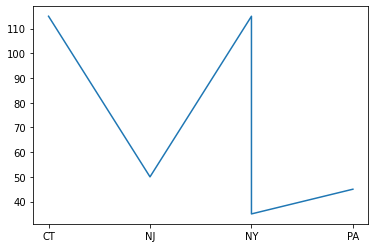

In [8]:
plt.plot( df3.state,df3.fine_amount)
plt.show()

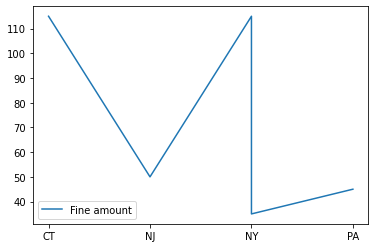

In [13]:
#*   Use and change a legend position

plt.plot( df3.state,df3.fine_amount)

plt.legend(['Fine amount'], loc='lower left')
plt.show()

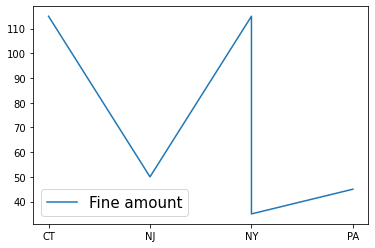

In [14]:
#*   Change a legend font size
plt.plot( df3.state,df3.fine_amount)

plt.legend(['Fine amount'], loc='lower left',prop={'size':15})
plt.show()

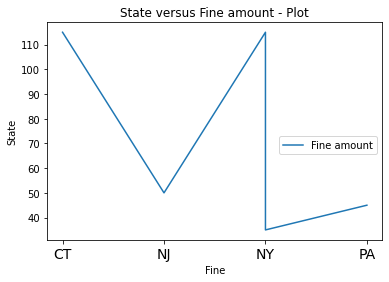

In [22]:
plt.plot( df3.state,df3.fine_amount)
 

#*   Place a legend outside of the plot
#*   Change the title and x/y labels
#*   Change size of axis Labels

plt.legend(['Fine amount'], bbox_to_anchor=(1, 0.5))
plt.title("State versus Fine amount - Plot")
plt.xlabel('Fine')
plt.ylabel('State')

plt.tick_params(axis='x', labelsize=14)

plt.show()

### **Part 2:**
Recreate the visualizations above using the Seaborn library as best as possible.  

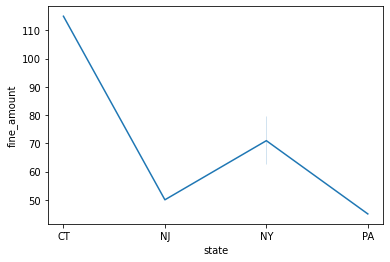

In [32]:
g = sns.lineplot(x="state", y="fine_amount", data=df3)
plt.show()

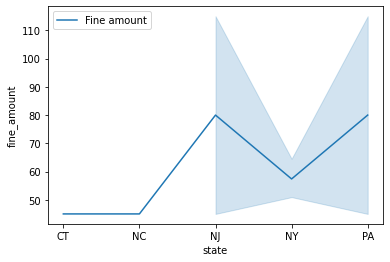

In [47]:
#*   Use and change a legend position

g = sns.lineplot(x="state", y="fine_amount", data=df3)

plt.legend(['Fine amount'], loc='upper left')
plt.show()

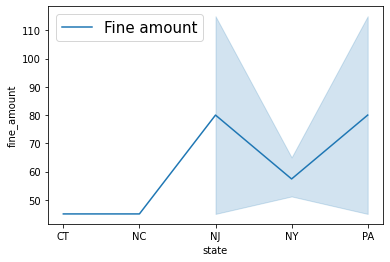

In [50]:
#*   Change a legend font size
g = sns.lineplot(x="state", y="fine_amount", data=df3)

plt.legend(['Fine amount'], loc='upper left',prop={'size':15})
plt.show()

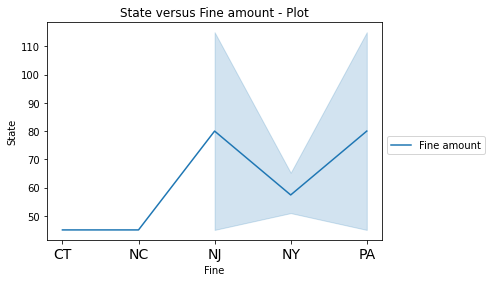

In [51]:

#*   Place a legend outside of the plot
#*   Change the title and x/y labels
#*   Change size of axis Labels
g = sns.lineplot(x="state", y="fine_amount", data=df3)

plt.legend(['Fine amount'], bbox_to_anchor=(1, 0.5))
plt.title("State versus Fine amount - Plot")
plt.xlabel('Fine')
plt.ylabel('State')

plt.tick_params(axis='x', labelsize=14)

<Figure size 432x288 with 0 Axes>

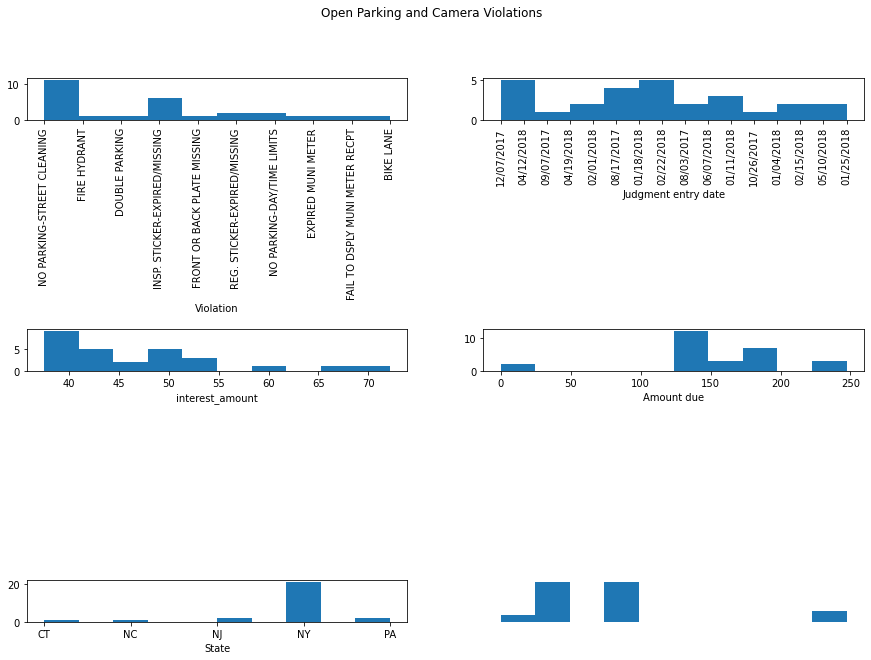

In [59]:
# Since we don't see much difference between matplotlib and seaborn unptil, so see it further lets try
# plotting subgraphs

plt.clf()
(pf, pa) = plt.subplots(3, 2, figsize=(15,10))
plt.suptitle('Open Parking and Camera Violations')
plt.subplots_adjust(hspace=5)
plt.subplot(3, 2, 1)
plt.hist(data=df3, x='violation')
plt.xticks(rotation=90)
plt.xlabel('Violation')

plt.subplot(3, 2, 2)
plt.hist(data=df3, x='judgment_entry_date')
plt.xticks(rotation=90)
plt.xlabel('Judgment entry date')

plt.subplot(3, 2, 3)
plt.hist(data=df3, x='interest_amount')
plt.xlabel('interest_amount')

plt.subplot(3, 2, 4)
plt.hist(data=df3, x='amount_due')
plt.xlabel('Amount due')

plt.subplot(3, 2, 5)
plt.hist(data=df3, x='state')
plt.xlabel('State')

plt.subplot(3, 2, 6)
plt.hist(data=df3, x='fine_amount')
plt.xlabel('Fine amount')

pa[-1, -1].axis('off')
plt.show()

<Figure size 432x288 with 0 Axes>

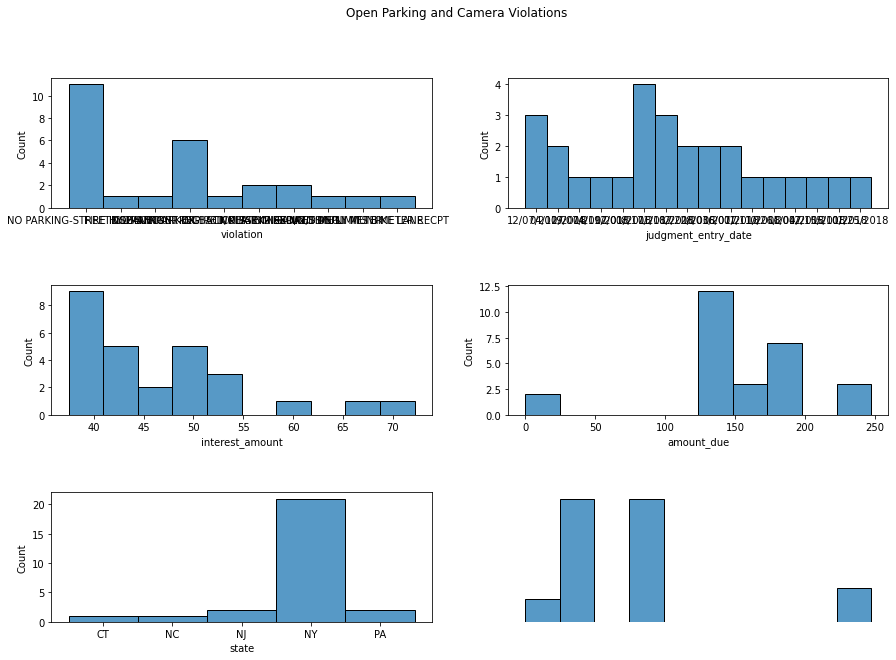

In [53]:
plt.clf()
(pf, pa) = plt.subplots(3, 2, figsize=(15,10))
plt.suptitle('Open Parking and Camera Violations')
plt.subplots_adjust(hspace=0.6)

sns.histplot(data=df3, x="violation", ax=pa[0,0], bins=10)
pa[0,0].set_xlabel('violation')
sns.histplot(data=df3, x="judgment_entry_date", ax=pa[0,1], bins=10)
pa[0,1].set_xlabel('judgment_entry_date')
sns.histplot(data=df3, x="interest_amount", ax=pa[1,0], bins=10)
pa[1,0].set_xlabel('interest_amount')
sns.histplot(data=df3, x="amount_due", ax=pa[1,1], bins=10)
pa[1,1].set_xlabel('amount_due')
sns.histplot(data=df3, x="state", ax=pa[2,0], bins=10)
pa[2,0].set_xlabel('state')
sns.histplot(data=df3, x="fine_amount", ax=pa[2,1], bins=10)
pa[2,1].set_xlabel('fine_amount')

pa[-1, -1].axis('off')
plt.show()

**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.

With initial plotting of line plot I didint see much of a difference in matplotlib and seaborn. Syntatictally there are differences and the seaborn is much more easier even for a first time user when compared to matplotlib.
While plotting subplots there are differences - each subplot had to be initialized with a plt.subplot statement in matplotlib where as in seaborn the axis could just be passed to the plot statement as an argument.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

We see that Connecticut(CT) has the highest payment amount, New tork has the highest total number of fines. Noparking - street cleaning is the highest fine type issued.